In [1]:
import pickle
import json
import requests
import pandas as pd
from riotwatcher import LolWatcher, ApiError
import numpy as np
import matplotlib.pyplot as plt
# from time import sleep

"""with open('data/api-key.txt', 'r') as api:
    API_KEY = api.read()
lol_watcher = LolWatcher(API_KEY)

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4)"+
                    " AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135"+
                    " Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": API_KEY
}"""

np.random.seed(4)

CHAMP_ID = 64
TESTMATCH = "4748107995"

In [2]:
import os
import datetime

#import IPython
#import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
dfs_dict = pickle.load(open("data/timeline-di.p", "rb"))

In [4]:
gameids = list(dfs_dict.keys())
np.random.shuffle(gameids)
idcount = len(gameids)
splits = [int(idcount*i) for i in [0,.8,.9,1]]
train_ids = gameids[splits[0]:splits[1]]
val_ids = gameids[splits[1]:splits[2]]
test_ids = gameids[splits[2]:splits[3]]

In [5]:
dfs_dict[train_ids[1]][0:10]

,enemy6currentGold,enemy6totalGold,enemy6level,enemy6jungleMinionsKilled,enemy6x,enemy6y,enemy7currentGold,enemy7totalGold,enemy7level,enemy7jungleMinionsKilled,...,ally4jungleMinionsKilled,ally4x,ally4y,ally_side,playercurrentGold,playertotalGold,playerlevel,playerjungleMinionsKilled,playerx,playery
0,500.0,500.0,1.0,0.0,351.0,293.0,500.0,500.0,1.0,0.0,...,0.0,14237.0,14579.0,1,500,500,1,0,14486,14291
1,0.0,500.0,1.0,0.0,6882.0,6193.0,0.0,500.0,1.0,0.0,...,0.0,8509.0,5793.0,1,0,500,1,0,6898,8118
2,83.0,583.0,1.0,0.0,6210.0,6515.0,97.0,597.0,1.0,0.0,...,0.0,13097.0,2406.0,1,120,620,2,4,11453,6775
3,678.0,1178.0,3.0,0.0,8081.0,6800.0,427.0,927.0,3.0,0.0,...,0.0,14340.0,14391.0,1,579,1079,3,12,12431,2627
4,79.0,1364.0,3.0,0.0,5373.0,5570.0,662.0,1162.0,4.0,0.0,...,0.0,13769.0,4030.0,1,758,1258,3,13,10996,8668
5,411.0,1696.0,5.0,0.0,7192.0,7922.0,50.0,1550.0,5.0,0.0,...,0.0,13341.0,2434.0,1,1152,1652,4,23,6601,12746
6,60.0,2095.0,5.0,0.0,2838.0,2296.0,114.0,1764.0,5.0,0.0,...,0.0,12671.0,2094.0,1,37,1962,4,24,13522,7877
7,301.0,2336.0,6.0,0.0,6808.0,7439.0,609.0,2259.0,6.0,4.0,...,0.0,12705.0,3059.0,1,280,2205,5,29,11064,8619
8,625.0,2660.0,7.0,0.0,8198.0,6693.0,899.0,2549.0,7.0,4.0,...,0.0,12988.0,3607.0,1,657,2582,6,40,7533,8352
9,218.0,2953.0,7.0,0.0,6421.0,6660.0,427.0,2877.0,7.0,4.0,...,0.0,12922.0,2098.0,1,801,2726,6,40,12571,6306


In [6]:
#train_ids[0]
test0 = dfs_dict[train_ids[0]][0:20]#.drop(["timestamp"],axis=1)
test1 = dfs_dict[train_ids[1]][0:20]#.drop(["timestamp"],axis=1)
column_indices = {name: i for i, name in enumerate(test0.columns)}

In [7]:
test0

,enemy6currentGold,enemy6totalGold,enemy6level,enemy6jungleMinionsKilled,enemy6x,enemy6y,enemy7currentGold,enemy7totalGold,enemy7level,enemy7jungleMinionsKilled,...,ally4jungleMinionsKilled,ally4x,ally4y,ally_side,playercurrentGold,playertotalGold,playerlevel,playerjungleMinionsKilled,playerx,playery
0,500.0,500.0,1.0,0.0,14486.0,14291.0,500.0,500.0,1.0,0.0,...,0.0,560.0,581.0,0,500,500,1,0,560,361
1,0.0,500.0,1.0,0.0,7060.0,9588.0,0.0,500.0,1.0,0.0,...,0.0,2888.0,11098.0,0,0,500,1,0,4580,6885
2,121.0,621.0,2.0,4.0,11984.0,6891.0,65.0,565.0,1.0,0.0,...,0.0,1836.0,12199.0,0,121,621,2,4,2639,8080
3,518.0,1018.0,3.0,16.0,6634.0,11506.0,259.0,759.0,2.0,0.0,...,0.0,2853.0,13321.0,0,518,1018,3,16,7145,3739
4,1373.0,1873.0,4.0,28.0,6431.0,8093.0,394.0,894.0,3.0,0.0,...,0.0,1507.0,11145.0,0,101,1376,4,24,5437,4947
5,116.0,2041.0,5.0,29.0,6989.0,9945.0,584.0,1084.0,3.0,0.0,...,0.0,3153.0,13180.0,0,620,1895,4,28,4137,13003
6,1217.0,3142.0,6.0,36.0,8106.0,10498.0,785.0,1285.0,4.0,0.0,...,0.0,1534.0,8762.0,0,163,2338,4,28,2426,8373
7,1529.0,3454.0,6.0,44.0,10060.0,4433.0,274.0,1449.0,4.0,0.0,...,0.0,4117.0,9828.0,0,560,2735,5,40,5570,7588
8,234.0,3734.0,7.0,48.0,5651.0,12879.0,58.0,1673.0,5.0,0.0,...,0.0,1701.0,12879.0,0,857,3032,6,47,3365,8034
9,530.0,4030.0,7.0,54.0,7649.0,11545.0,193.0,1883.0,5.0,0.0,...,0.0,2374.0,9869.0,0,48,3523,6,55,2484,1600


In [8]:
test0.columns

Index(['enemy6currentGold', 'enemy6totalGold', 'enemy6level',
       'enemy6jungleMinionsKilled', 'enemy6x', 'enemy6y', 'enemy7currentGold',
       'enemy7totalGold', 'enemy7level', 'enemy7jungleMinionsKilled',
       'enemy7x', 'enemy7y', 'enemy8currentGold', 'enemy8totalGold',
       'enemy8level', 'enemy8jungleMinionsKilled', 'enemy8x', 'enemy8y',
       'enemy9currentGold', 'enemy9totalGold', 'enemy9level',
       'enemy9jungleMinionsKilled', 'enemy9x', 'enemy9y', 'enemy10currentGold',
       'enemy10totalGold', 'enemy10level', 'enemy10jungleMinionsKilled',
       'enemy10x', 'enemy10y', 'ally1currentGold', 'ally1totalGold',
       'ally1level', 'ally1jungleMinionsKilled', 'ally1x', 'ally1y',
       'ally2currentGold', 'ally2totalGold', 'ally2level',
       'ally2jungleMinionsKilled', 'ally2x', 'ally2y', 'ally3currentGold',
       'ally3totalGold', 'ally3level', 'ally3jungleMinionsKilled', 'ally3x',
       'ally3y', 'ally4currentGold', 'ally4totalGold', 'ally4level',
       'ally4j

In [9]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 full_df=test0, val_df = test1,
                 dfdi=dfs_dict,
                 #train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        #self.train_df = train_df
        #self.val_df = val_df
        #self.test_df = test_df
        self.full_df = full_df
        self.val_df = val_df
        self.dfdi = dfdi
        self.trainli = None
        self.valli = None
        self.testli = None

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(full_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

In [10]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
    

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [11]:
def plot(self, model=None, input_width=3, plot_col="playerx", max_subplots=3):
    inputs, labels = self.train
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                         label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                                edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)[:,:,0]
            x = list(range(input_width,input_width+predictions[n].shape[0]))
            y = predictions[n]
            plt.scatter(x, y,
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [m]')

WindowGenerator.plot = plot

In [12]:
def plot_map(self, model=None, input_width=3, plot_col=["playerx","playery"], max_subplots=3):
    inputs, labels = self.val
    plt.figure(figsize=(5, 15))
    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]
    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)
    print("input",inputs.shape)
    print("xy",xy_inputs.shape)
    print("label indices", self.label_indices)
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.xlim(0,15000)
        plt.ylim(0,15000)
        img = plt.imread("data/map.png")
        plt.imshow(img, extent=[0,15000,0,15000],)
        for i in range(xy_inputs.shape[1]-1):
            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1], zorder=10, color="blue")#color=(.8-i/10,1-i/8,1-i/8))
            plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                     marker='${}$'.format(str(i)), s=120, zorder=20, color=(.8,.8,1))##color=(.8-i/10,1-i/8,1-i/8))
        print("true",i)
        #if self.label_columns:
        #    label_col_index = self.label_columns_indices.get(plot_col, None)
        #else:
        label_col_index = plot_col_index

        #if label_col_index is None:
        #    continue

        #plt.scatter(self.label_indices, labels[n, :, label_col_index],
        #                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
        
        if model is not None:
            predictions = model(inputs)
            for i in range(predictions.shape[1]-1):
                plt.plot(predictions[n, i:i+2, 0], predictions[n, i:i+2, 1], zorder=10, color=(1,0,0))#color=(1-i/8,.8-i/10,1-i/8))
                plt.scatter(predictions[n, i, 0], predictions[n, i, 1],
                         marker='${}$'.format(str(i+input_width)), s=120, zorder=20, color=(1,.8,.8))#color=(1-i/8,.8-i/10,1-i/8))
                
            """x = list(range(input_width,input_width+predictions[n].shape[0]))
            y = predictions[n]
            plt.scatter(x, y,
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)"""
        print("predi",i)
        i=i+1
        try:
            plt.scatter(predictions[n, i, 0], predictions[n, i, 1],
                        marker='${}$'.format(str(i+input_width)),
                        s=120, zorder=20, color=(1,.8,.8))
        except:# InvalidArgumentError:
            plt.scatter(predictions[n, 0, 0], predictions[n, 0, 1],
                        marker='${}$'.format(str(i+input_width)),
                        s=120, zorder=20, color=(1,.8,.8))
        #i=i+1
        plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                         marker='${}$'.format(str(i)), s=120, zorder=20, color=(.8,.8,1))
    print("prediction shape", predictions.shape)
    print(xy_inputs.shape)
    print("xy input", xy_inputs[0, :, :])
    print("predictions",predictions[0,:,:])
    
        

    plt.xlabel('Time [m]')

WindowGenerator.plot_map = plot_map

In [13]:
def plot_map2(self, model=None, input_width=3, plot_col=["playerx","playery"], max_subplots=3):
    #new plotmap2
    inputs, labels = self.val
    # from https://stackoverflow.com/questions/56575877/shuffling-two-tensors-in-the-same-order
    indices = tf.range(start=0, limit=tf.shape(inputs)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)
    inputs = tf.gather(inputs, shuffled_indices)
    labels = tf.gather(labels, shuffled_indices)
    
    plt.figure(figsize=(5, 15))
    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]
    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)
    """# 1120 10 61
    print("input", inputs.shape)
    print("xy", xy_inputs.shape)
    print("label indices", self.label_indices)"""
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.xlim(0,15000)
        plt.ylim(0,15000)
        img = plt.imread("data/map.png")
        plt.imshow(img, extent=[0,15000,0,15000],)
        for i in range(xy_inputs.shape[1]):
            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1], zorder=10, color="blue")#color=(.8-i/10,1-i/8,1-i/8))
            plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                     marker='${}$'.format(str(i)), s=120, zorder=20, color="white")##color=(.8-i/10,1-i/8,1-i/8))

        label_col_index = plot_col_index
        
        if model is not None:
            predictions = []
            print(inputs.shape)
            for i in range(inputs.shape[1]-1):
                try:
                    current = model.predict(inputs[n,i:i+input_width,:])
                    predictions.append(current[0,:])
                except ValueError:
                    # an attempt to make plotmap work with multistep dense 
                    predictions = model.predict(tf.expand_dims(inputs[n,:,:],axis=0))
                    predictions = predictions[0,:,:]
                #print("pred shape", current.shape)
                
                
            for i in range(len(predictions)-1):
                # print(i)
                line_x_0 = predictions[i][0]
                line_x_1 = predictions[i+1][0]
                line_y_0 = predictions[i][1]
                line_y_1 = predictions[i+1][1]
                # print("xy",xy_inputs[n, i:i+2, 0])
                plt.plot([xy_inputs[n, i+input_width-1, 0],line_x_0], [xy_inputs[n, i+input_width-1, 1], line_y_0], zorder=10, color=(1,0,0))#color=(1-i/8,.8-i/10,1-i/8))
                #print("x",line_x,"y",line_y, "x_0", line_x[0])
                plt.scatter(line_x_0, line_y_0, marker='${}$'.format(str(i+input_width)),
                            s=120, zorder=20, color=(1,.8,.5))#color=(1-i/8,.8-i/10,1-i/8))
            # print("preds",predictions)
        
        i=i+1
        # print("hello",i)
        plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                         marker='${}$'.format(str(i)), s=120, zorder=20, color="white")
        #plt.scatter(predictions[n, i, 0], predictions[n, i, 1],
        #                     marker='${}$'.format(str(i+input_width)), s=120, zorder=20, color="white")
    #print("prediction shape", predictions.shape)
    #print(xy_inputs.shape)
    #print("xy input", xy_inputs[0, :, :])
    #print("predictions",predictions[0,:,:])
    
WindowGenerator.plot_map2 = plot_map2

In [14]:
"""
old plot_map2 holding on to it just in case
def plot_map2(self, model=None, input_width=3, plot_col=["playerx","playery"], max_subplots=3):
    inputs, labels = self.train
    plt.figure(figsize=(5, 15))
    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]
    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)
    # 1120 10 61
    print("input", inputs.shape)
    print("xy", xy_inputs.shape)
    print("label indices", self.label_indices)
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.xlim(0,15000)
        plt.ylim(0,15000)
        img = plt.imread("data/map.png")
        plt.imshow(img, extent=[0,15000,0,15000],)
        for i in range(xy_inputs.shape[1]-1):
            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1], zorder=10, color="blue")#color=(.8-i/10,1-i/8,1-i/8))
            plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                     marker='${}$'.format(str(i)), s=120, zorder=20, color="white")##color=(.8-i/10,1-i/8,1-i/8))

        label_col_index = plot_col_index
        
        if model is not None:
            predictions = []
            for i in range(inputs.shape[1]-1):
                current = model.predict(inputs[n,i:i+input_width,:])
                print("pred shape", current.shape)
                predictions.append(current[0,:])
                
            for i in range(len(predictions)-1):
                print(i)
                line_x_0 = predictions[i][0]
                line_x_1 = predictions[i+1][0]
                line_y_0 = predictions[i][1]
                line_y_1 = predictions[i+1][1]
                plt.plot([line_x_0, line_x_1], [line_y_0, line_y_1], zorder=10, color=(1,0,0))#color=(1-i/8,.8-i/10,1-i/8))
                #print("x",line_x,"y",line_y, "x_0", line_x[0])
                plt.scatter(line_x_0, line_y_0, marker='${}$'.format(str(i+3)),
                            s=120, zorder=20, color=(1,.5,.5))#color=(1-i/8,.8-i/10,1-i/8))
            print("preds",predictions)
            return None
        
        i=i+1
        #plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
        #                 marker='${}$'.format(str(i)), s=120, zorder=20, color="white")
        #plt.scatter(predictions[n, i, 0], predictions[n, i, 1],
        #                     marker='${}$'.format(str(i+input_width)), s=120, zorder=20, color="white")
    print("prediction shape", predictions.shape)
    print(xy_inputs.shape)
    print("xy input", xy_inputs[0, :, :])
    print("predictions",predictions[0,:,:])
    
WindowGenerator.plot_map2 = plot_map2"""

'\nold plot_map2 holding on to it just in case\ndef plot_map2(self, model=None, input_width=3, plot_col=["playerx","playery"], max_subplots=3):\n    inputs, labels = self.train\n    plt.figure(figsize=(5, 15))\n    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]\n    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)\n    # 1120 10 61\n    print("input", inputs.shape)\n    print("xy", xy_inputs.shape)\n    print("label indices", self.label_indices)\n    max_n = min(max_subplots, len(inputs))\n    for n in range(max_n):\n        plt.subplot(3, 1, n+1)\n        plt.ylabel(f\'{plot_col}\')\n        plt.xlim(0,15000)\n        plt.ylim(0,15000)\n        img = plt.imread("data/map.png")\n        plt.imshow(img, extent=[0,15000,0,15000],)\n        for i in range(xy_inputs.shape[1]-1):\n            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1], zorder=10, color="blue")#color=(.8-i/10,1-i/8,1-i/8))\n            plt.scatter(xy_inputs[n, i, 0], xy_

In [15]:
def plot_map3(self, model=None, input_width=3, plot_col=["playerx","playery"], max_subplots=3):
    inputs, labels = self.train
    plt.figure(figsize=(5, 15))
    plot_col_index = [self.column_indices[plot_col[0]], self.column_indices[plot_col[1]]]
    xy_inputs = tf.gather(inputs,plot_col_index,axis=2)
    # 1120 10 61
    print("input", inputs.shape)
    print("xy", xy_inputs.shape)
    print("label indices", self.label_indices)
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col}')
        plt.xlim(0,15000)
        plt.ylim(0,15000)
        img = plt.imread("data/map.png")
        plt.imshow(img, extent=[0,15000,0,15000],)
        for i in range(xy_inputs.shape[1]-1):
            plt.plot(xy_inputs[n, i:i+2, 0], xy_inputs[n, i:i+2, 1], zorder=10, color="blue")#color=(.8-i/10,1-i/8,1-i/8))
            plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
                     marker='${}$'.format(str(i)), s=120, zorder=20, color="white")##color=(.8-i/10,1-i/8,1-i/8))

        label_col_index = plot_col_index
        
        if model is not None:
            predictions = inputs[n,0:input_width,:]
            for i in range(input_width):
                prediction = model.predict(predictions[n,i:input_width,:])
                predictions = tf.concat([predictions,prediction],axis=1)
                print(predictions)
                return None
                
                
                
                
            for i in range(inputs.shape[1]-1):
                current = model.predict(inputs[n,i:i+3,:])
                print(current.shape)
                predictions.append(current)
            for i in range(len(predictions)-1):
                line_x = predictions[i][0],predictions[i+1][0]
                line_y = predictions[i][1],predictions[i+1][1]
                plt.plot(line_x, line_y, zorder=10, color=(1,0,0))#color=(1-i/8,.8-i/10,1-i/8))
                plt.scatter(line_x[0], line_y[0], marker='${}$'.format(str(i+input_width)),
                            s=120, zorder=20, color=(1,.5,.5))#color=(1-i/8,.8-i/10,1-i/8))
            print(predictions)
            return None
        
        i=i+1
        #plt.scatter(xy_inputs[n, i, 0], xy_inputs[n, i, 1],
        #                 marker='${}$'.format(str(i)), s=120, zorder=20, color="white")
        #plt.scatter(predictions[n, i, 0], predictions[n, i, 1],
        #                     marker='${}$'.format(str(i+input_width)), s=120, zorder=20, color="white")
    print("prediction shape", predictions.shape)
    print(xy_inputs.shape)
    print("xy input", xy_inputs[0, :, :])
    print("predictions",predictions[0,:,:])
    
WindowGenerator.plot_map3 = plot_map3

In [16]:
def make_dataset(self, data, list_me=False):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

    ds = ds.map(self.split_window)
    if list_me:
        return list(ds)
    return ds

WindowGenerator.make_dataset = make_dataset

In [17]:
def make_split_from_dfdi(self,gameids=gameids,splits=(0,.7,.8,.9,1),minmax=(0,20)):
    # minmax is start and end time of window being sampled from.
    # splits is where the data is being split for train val test split
    if self.dfdi is None:
        print("no dfdi attached")
        raise KeyError("no dfdi attached")
    dict_len = len(gameids)
    splits = [int(i*dict_len) for i in splits]
    print(splits)
    train_ids = gameids[splits[0]:splits[1]]
    val_ids = gameids[splits[1]:splits[2]]
    test_ids = gameids[splits[2]:splits[3]]
    holdout_ids = gameids[splits[3]:splits[4]]
    if self.trainli is None:
        trainli = build_batch(self, self.dfdi, train_ids, minmax)
        train_feats = tf.concat([batch[0] for batch in trainli], axis=0)
        train_labels = tf.concat([batch[1] for batch in trainli], axis=0)
        
    if self.valli is None:
        valli = build_batch(self, self.dfdi, val_ids, minmax)
        val_feats = tf.concat([batch[0] for batch in valli], axis=0)
        val_labels = tf.concat([batch[1] for batch in valli], axis=0)
            
    if self.testli is None:
        testli = build_batch(self, self.dfdi, test_ids, minmax)
        test_feats = tf.concat([batch[0] for batch in testli], axis=0)
        test_labels = tf.concat([batch[1] for batch in testli], axis=0)
            
        
    print(train_feats.shape, train_labels.shape)
    self.train = (train_feats, train_labels)
    self.val = (val_feats, val_labels)
    self.test = (test_feats, test_labels)
    

WindowGenerator.make_split_from_dfdi = make_split_from_dfdi

In [18]:
@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.example = example

In [19]:
def build_batch(self, dfdi, id_li, minmax):
    """
    dfdi: dictionary of shape matchid: dataframe
    id_li: list of matchids sorted from oldest to newest
    minmax: list of start and end time of what times to build from - if game is shorter than max, just uses last time
    returns a list of tf tensors
    """
    dataset_li = []
    for match_id in id_li:
        df = dfdi[match_id]
        df = df.iloc[minmax[0]:minmax[1]]
        dataset_li = dataset_li + make_dataset(self, data=df, list_me=True)
    return dataset_li

WindowGenerator.build_batch = build_batch

In [20]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=["playerx", "playery"])#,
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['playerx', 'playery']

In [21]:
conv_window_3 = WindowGenerator(
    input_width=3,
    label_width=1,
    shift=1,
    label_columns=["playerx","playery"])

conv_window_3

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['playerx', 'playery']

In [22]:
conv_window_4 = WindowGenerator(
    input_width=4,
    label_width=1,
    shift=1,
    label_columns=["playerx","playery"])

conv_window_4

Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['playerx', 'playery']

In [23]:
conv_window_2 = WindowGenerator(
    input_width=2,
    label_width=1,
    shift=1,
    label_columns=["playerx","playery"])

conv_window_2

Total window size: 3
Input indices: [0 1]
Label indices: [2]
Label column name(s): ['playerx', 'playery']

In [24]:
windows = {2:conv_window_2, 3:conv_window_3, 4:conv_window_4}

In [25]:
wide_window = WindowGenerator(
    input_width=10, label_width=10, shift=1,
    label_columns=["playerx","playery"])

wide_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 1  2  3  4  5  6  7  8  9 10]
Label column name(s): ['playerx', 'playery']

In [26]:
single_step_window.make_split_from_dfdi()

[0, 140, 160, 180, 200]
(2660, 1, 61) (2660, 1, 2)


In [27]:
conv_window_2.make_split_from_dfdi()
conv_window_3.make_split_from_dfdi()
conv_window_4.make_split_from_dfdi()

[0, 140, 160, 180, 200]
(2520, 2, 61) (2520, 1, 2)
[0, 140, 160, 180, 200]
(2380, 3, 61) (2380, 1, 2)
[0, 140, 160, 180, 200]
(2240, 4, 61) (2240, 1, 2)


In [28]:
wide_window.make_split_from_dfdi()

[0, 140, 160, 180, 200]
(1400, 10, 61) (1400, 10, 2)


In [29]:
def tensor_distance_mae(y_true, y_pred):
    """takes two [n,1,2] tensors and returns the sum distance between the points"""
    if y_true.shape[1:] != y_pred.shape[1:]:
        print(y_true)
        print(y_true[:,:,1])
        print(y_pred)
        #"""
        raise ValueError("passed tensors have different shape "
                         + str(y_true.shape) + " "
                         + str(y_pred.shape) + "\n"
                         + str(y_true) + "\n"
                         + str(y_pred)
                        )#"""
    dx2 = (y_true[:,:,0] - y_pred[:,:,0])**2
    dy2 = (y_true[:,:,1] - y_pred[:,:,1])**2
    dist = (dx2 + dy2)**.5
    dist_sum = tf.math.reduce_mean(dist)
    return dist_sum

In [30]:
def tensor_distance_rmse(y_true, y_pred):
    """takes two [n,1,2] tensors and returns the root sum squared distance between the points"""
    if y_true.shape[1:] != y_pred.shape[1:]:
        raise ValueError("passed tensors have different shape")
    dx2 = (y_true[:,:,0] - y_pred[:,:,0])**2
    dy2 = (y_true[:,:,1] - y_pred[:,:,1])**2
    dist2 = dx2 + dy2
    dist2_sum = tf.math.reduce_mean(dist2)
    mae = dist2_sum**.5
    return mae

In [31]:
"""train_1 = single_step_window.train# = tf.data.Dataset.from_tensor_slices([train_feats, train_labels])
val_1 = single_step_window.val
test_1 = single_step_window.test"""
# going to use a subset of the conv test set as my test set
#test_hold[0].shape, test_hold[1].shape

'train_1 = single_step_window.train# = tf.data.Dataset.from_tensor_slices([train_feats, train_labels])\nval_1 = single_step_window.val\ntest_1 = single_step_window.test'

In [32]:
# going to use a subset of the conv test set as my test set
train = {}
val = {}
test = {}
train[1] = single_step_window.train
val[1] = single_step_window.val
for i in sorted(windows.keys()):
    train[i] = windows[i].train
    val[i] = windows[i].val

# i is largest lookback size
# use largest window's test set as test set for other windows by slicing largest window
test[i] = windows[i].test
for n in range(1,i):
    test[n] = (test[i][0][:,-n:,:], test[i][1])
    display(test[n][0].shape)

TensorShape([320, 1, 61])

TensorShape([320, 2, 61])

TensorShape([320, 3, 61])

In [33]:
#conv_test[0][:,-1:,:].shape, conv_test[1].shape

In [34]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        elif isinstance(self.label_index,(list,tuple)):
            return inputs[:,:, self.label_index[0]:self.label_index[1]+1]
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [35]:
baseline = Baseline(label_index=[column_indices["playerx"],column_indices["playery"]])

In [36]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2)
])

In [37]:

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2)
])

In [38]:
multi_dense_models = {}
for k in sorted(windows.keys()):
    multi_dense_models[k] = tf.keras.Sequential([
        # Shape: (time, features) => (time*features)
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=2),
        # Add back the time dimension.
        # Shape: (outputs) => (1, outputs) --- this is from guide's code
        # looks like it might be causing errs ----- nvm :( i wish it was the cause
        tf.keras.layers.Reshape([1, -1]),
    ])

In [39]:
conv_models = {}
for k in sorted(windows.keys()):
    conv_models[k] = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=32,
                               kernel_size=(k),
                               activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=2),
    ])

In [40]:
# lstm model isn't functional yet sob
"""lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=2)
])"""

'lstm_model = tf.keras.models.Sequential([\n    # Shape [batch, time, features] => [batch, time, lstm_units]\n    tf.keras.layers.LSTM(32, return_sequences=True),\n    # Shape => [batch, time, features]\n    tf.keras.layers.Dense(units=2)\n])'

In [41]:
baseline.compile(loss=tensor_distance_mae,
                 metrics=tensor_distance_mae)
linear.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
dense.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )

In [42]:
for model in multi_dense_models.values():
    model.compile(loss=tensor_distance_mae,
                   metrics=tensor_distance_mae,
                   optimizer=tf.optimizers.Adam()
                  )

In [43]:
for model in conv_models.values():
    model.compile(loss=tensor_distance_mae,
               metrics=tensor_distance_mae,
               optimizer=tf.optimizers.Adam()
              )
# lstm model isn't functional yet sob
"""lstm_model.compile(loss=tf.losses.MeanSquaredError(),
               metrics=tf.losses.MeanSquaredError(),
               #optimizer=tf.optimizers.Adam()
              )"""

'lstm_model.compile(loss=tf.losses.MeanSquaredError(),\n               metrics=tf.losses.MeanSquaredError(),\n               #optimizer=tf.optimizers.Adam()\n              )'

In [44]:
baseline.fit(x=train[1][0],
           y=train[1][1],
           batch_size=32,
           epochs=15,
           verbose=1,
           validation_data=val[1]
          )

Epoch 1/15
84/84 [==============================] - 0s 3ms/step - loss: 5701.6724 - tensor_distance_mae: 5699.8340 - val_loss: 5577.0986 - val_tensor_distance_mae: 5572.6763
Epoch 2/15
84/84 [==============================] - 0s 1ms/step - loss: 5701.6733 - tensor_distance_mae: 5682.8091 - val_loss: 5577.0986 - val_tensor_distance_mae: 5572.6763
Epoch 3/15
84/84 [==============================] - 0s 1ms/step - loss: 5701.6729 - tensor_distance_mae: 5702.7598 - val_loss: 5577.0986 - val_tensor_distance_mae: 5572.6763
Epoch 4/15
84/84 [==============================] - 0s 971us/step - loss: 5701.6724 - tensor_distance_mae: 5674.5259 - val_loss: 5577.0986 - val_tensor_distance_mae: 5572.6763
Epoch 5/15
84/84 [==============================] - 0s 1ms/step - loss: 5701.6729 - tensor_distance_mae: 5692.2305 - val_loss: 5577.0986 - val_tensor_distance_mae: 5572.6763
Epoch 6/15
84/84 [==============================] - 0s 2ms/step - loss: 5701.6733 - tensor_distance_mae: 5698.0195 - val_loss: 5

In [45]:
linear.fit(x=train[1][0],
           y=train[1][1],
           batch_size=32,
           epochs=15,
           verbose=1,
           validation_data=val[1]
          )

Epoch 1/15
84/84 [==============================] - 0s 3ms/step - loss: 8461.7754 - tensor_distance_mae: 8401.1035 - val_loss: 5993.4287 - val_tensor_distance_mae: 5992.1060
Epoch 2/15
84/84 [==============================] - 0s 2ms/step - loss: 5838.9863 - tensor_distance_mae: 5868.9214 - val_loss: 5651.8354 - val_tensor_distance_mae: 5647.9082
Epoch 3/15
84/84 [==============================] - 0s 2ms/step - loss: 5464.6650 - tensor_distance_mae: 5470.6396 - val_loss: 5266.8203 - val_tensor_distance_mae: 5261.7124
Epoch 4/15
84/84 [==============================] - 0s 2ms/step - loss: 5148.9912 - tensor_distance_mae: 5138.6367 - val_loss: 5000.8198 - val_tensor_distance_mae: 4994.1035
Epoch 5/15
84/84 [==============================] - 0s 2ms/step - loss: 4919.3179 - tensor_distance_mae: 4910.5278 - val_loss: 4866.9019 - val_tensor_distance_mae: 4858.8042
Epoch 6/15
84/84 [==============================] - 0s 4ms/step - loss: 4774.7437 - tensor_distance_mae: 4782.3066 - val_loss: 469

In [46]:
dense.fit(x=train[1][0],
           y=train[1][1],
           batch_size=32,
           epochs=60,
           verbose=1,
           validation_data=val[1]
          )

Epoch 1/60
84/84 [==============================] - 0s 4ms/step - loss: 5113.7632 - tensor_distance_mae: 5098.0591 - val_loss: 4487.0444 - val_tensor_distance_mae: 4483.3618
Epoch 2/60
84/84 [==============================] - 0s 2ms/step - loss: 4345.1855 - tensor_distance_mae: 4333.4038 - val_loss: 4293.2676 - val_tensor_distance_mae: 4290.8091
Epoch 3/60
84/84 [==============================] - 0s 2ms/step - loss: 4237.3955 - tensor_distance_mae: 4252.9258 - val_loss: 4283.6499 - val_tensor_distance_mae: 4280.8755
Epoch 4/60
84/84 [==============================] - 0s 2ms/step - loss: 4205.1401 - tensor_distance_mae: 4200.3057 - val_loss: 4220.2827 - val_tensor_distance_mae: 4219.3179
Epoch 5/60
84/84 [==============================] - 0s 2ms/step - loss: 4164.2095 - tensor_distance_mae: 4179.2739 - val_loss: 4224.3911 - val_tensor_distance_mae: 4224.5981
Epoch 6/60
84/84 [==============================] - 0s 2ms/step - loss: 4143.7329 - tensor_distance_mae: 4145.3379 - val_loss: 417

Epoch 48/60
84/84 [==============================] - 0s 1ms/step - loss: 3262.6038 - tensor_distance_mae: 3257.3442 - val_loss: 4649.5747 - val_tensor_distance_mae: 4649.0054
Epoch 49/60
84/84 [==============================] - 0s 2ms/step - loss: 3237.9026 - tensor_distance_mae: 3240.3652 - val_loss: 4608.2915 - val_tensor_distance_mae: 4606.9106
Epoch 50/60
84/84 [==============================] - 0s 4ms/step - loss: 3224.0723 - tensor_distance_mae: 3220.6421 - val_loss: 4650.9126 - val_tensor_distance_mae: 4649.6094
Epoch 51/60
84/84 [==============================] - 0s 3ms/step - loss: 3198.7527 - tensor_distance_mae: 3205.1682 - val_loss: 4608.8071 - val_tensor_distance_mae: 4608.5796
Epoch 52/60
84/84 [==============================] - 0s 3ms/step - loss: 3179.9421 - tensor_distance_mae: 3168.9426 - val_loss: 4662.7261 - val_tensor_distance_mae: 4662.8198
Epoch 53/60
84/84 [==============================] - 0s 2ms/step - loss: 3161.4658 - tensor_distance_mae: 3143.5859 - val_los

In [47]:
for width in multi_dense_models.keys():
    multi_dense_models[width].fit(x=train[width][0],
           y=train[width][1],
           batch_size=32,
           epochs=15,
           verbose=1,
           validation_data=val[width]
          )

Epoch 1/15
79/79 [==============================] - 0s 5ms/step - loss: 5207.6475 - tensor_distance_mae: 5203.0015 - val_loss: 4334.4673 - val_tensor_distance_mae: 4295.3872
Epoch 2/15
79/79 [==============================] - 0s 3ms/step - loss: 4304.8120 - tensor_distance_mae: 4306.9521 - val_loss: 4271.6963 - val_tensor_distance_mae: 4238.1743
Epoch 3/15
79/79 [==============================] - 0s 2ms/step - loss: 4223.1509 - tensor_distance_mae: 4223.8926 - val_loss: 4275.6235 - val_tensor_distance_mae: 4239.6304
Epoch 4/15
79/79 [==============================] - 0s 3ms/step - loss: 4187.2144 - tensor_distance_mae: 4187.8774 - val_loss: 4280.7231 - val_tensor_distance_mae: 4258.5864
Epoch 5/15
79/79 [==============================] - ETA: 0s - loss: 4147.5322 - tensor_distance_mae: 4147.532 - 0s 3ms/step - loss: 4145.7910 - tensor_distance_mae: 4146.2744 - val_loss: 4235.5620 - val_tensor_distance_mae: 4211.9873
Epoch 6/15
79/79 [==============================] - 0s 2ms/step - loss

In [48]:
for width in conv_models.keys():
    conv_models[width].fit(x=train[width][0],
           y=train[width][1],
           batch_size=32,
           epochs=15,
           verbose=1,
           validation_data=val[width]
          )

Epoch 1/15
79/79 [==============================] - 0s 4ms/step - loss: 5001.8901 - tensor_distance_mae: 4999.2808 - val_loss: 4385.4980 - val_tensor_distance_mae: 4339.1704
Epoch 2/15
79/79 [==============================] - 0s 3ms/step - loss: 4294.4395 - tensor_distance_mae: 4295.6528 - val_loss: 4221.7866 - val_tensor_distance_mae: 4198.2217
Epoch 3/15
79/79 [==============================] - 0s 2ms/step - loss: 4205.5391 - tensor_distance_mae: 4205.8271 - val_loss: 4231.5820 - val_tensor_distance_mae: 4195.1460
Epoch 4/15
79/79 [==============================] - 0s 2ms/step - loss: 4182.6592 - tensor_distance_mae: 4183.4624 - val_loss: 4201.3633 - val_tensor_distance_mae: 4175.1294
Epoch 5/15
79/79 [==============================] - 0s 2ms/step - loss: 4139.8115 - tensor_distance_mae: 4140.5244 - val_loss: 4222.7388 - val_tensor_distance_mae: 4202.9487
Epoch 6/15
79/79 [==============================] - 0s 2ms/step - loss: 4138.1167 - tensor_distance_mae: 4136.8105 - val_loss: 421

In [49]:
"""lstm_model.fit(x=conv_train[0],
           y=conv_train[1],
           batch_size=32,
           epochs=30,
           verbose=1,
           validation_data=conv_val
          )"""

'lstm_model.fit(x=conv_train[0],\n           y=conv_train[1],\n           batch_size=32,\n           epochs=30,\n           verbose=1,\n           validation_data=conv_val\n          )'

In [50]:
# predict center is 7500,7500 for each row
center_pred = tf.fill(test[1][1].shape,7500.)
center_error = float(tensor_distance_mae(center_pred, test[1][1]))
center_error

4186.04052734375

In [51]:
# shuffle = True 
linear_error = linear.evaluate(test[1][0], test[1][1])#, batch_size=128)
baseline_error = baseline.evaluate(test[1][0], test[1][1])
dense_error = dense.evaluate(test[1][0], test[1][1])
#mdense_error = multi_step_dense.evaluate(conv_test[0], conv_test[1])
md_err = {}
conv_err = {}
for i in conv_models.keys():
    md_err[i] = conv_models[i].evaluate(test[i][0], test[i][1])
    conv_err[i] = multi_dense_models[i].evaluate(test[i][0], test[i][1])
    print("multistep dense model mae",str(i), md_err[i][1])
    print("convolutional model mae",str(i), conv_err[i][1])
#conv_error = conv_model.evaluate(conv_test[0], conv_test[1])
print("baseline mae:", baseline_error[1])
print("center mae:", center_error)
print("linear mae:", linear_error[1])
print("dense mae:", dense_error[1])
#print("multistep dense mae:", mdense_error[1])
#print("conv mae:", conv_error[1])

10/10 [==============================] - 0s 3ms/step - loss: 4209.9570 - tensor_distance_mae: 4209.9570
multistep dense model mae 2 4186.1357421875
convolutional model mae 2 4209.95703125
10/10 [==============================] - 0s 2ms/step - loss: 4224.1025 - tensor_distance_mae: 4224.1025
multistep dense model mae 3 4218.48681640625
convolutional model mae 3 4224.1025390625
10/10 [==============================] - 0s 1ms/step - loss: 4189.4736 - tensor_distance_mae: 4189.4736
multistep dense model mae 4 4084.598876953125
convolutional model mae 4 4189.4736328125
baseline mae: 5483.32666015625
center mae: 4186.04052734375
linear mae: 4463.046875
dense mae: 4687.033203125


In [52]:
#wide_window.plot_map(dense,input_width=CONV_WIDTH,plot_col=["playerx","playery"])

(200, 10, 61)
(200, 10, 61)
(200, 10, 61)


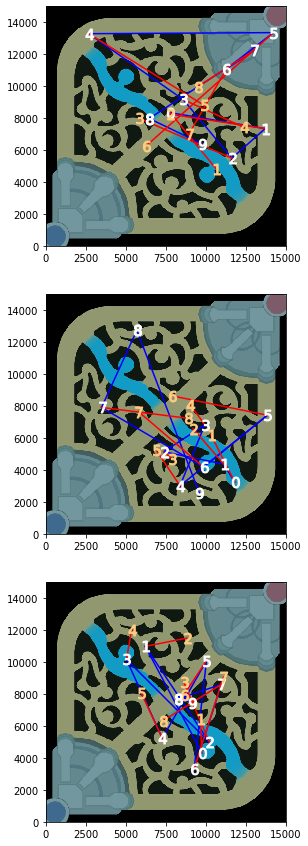

In [54]:
wide_window.plot_map2(dense,input_width=1,plot_col=["playerx","playery"])

(200, 10, 61)
(200, 10, 61)
(200, 10, 61)


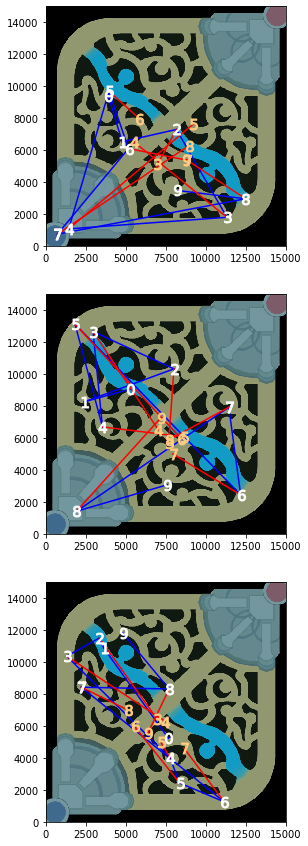

In [55]:
#wide_window.plot_map(dense,input_width=CONV_WIDTH,plot_col=["playerx","playery"])
wide_window.plot_map2(conv_models[3],input_width=3,plot_col=["playerx","playery"])

(200, 10, 61)
(200, 10, 61)
(200, 10, 61)


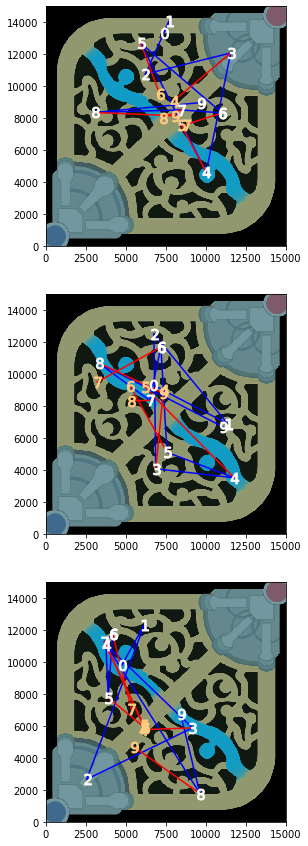

In [56]:
wide_window.plot_map2(conv_models[4],input_width=4,plot_col=["playerx","playery"])

(200, 10, 61)
(200, 10, 61)
(200, 10, 61)


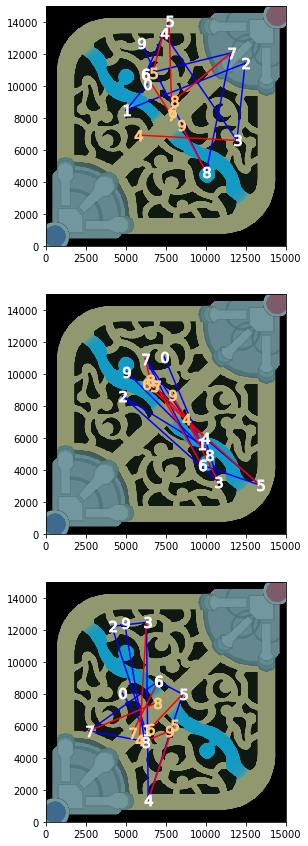

In [57]:
wide_window.plot_map2(conv_models[4],input_width=4,plot_col=["playerx","playery"])

In [51]:
#wide_window.plot_mapxxxxxx2(conv_model,input_width=CONV_WIDTH,plot_col=["playerx","playery"])

In [52]:
test_hold[0]

<tf.Tensor: shape=(340, 1, 61), dtype=float32, numpy=
array([[[1.010e+03, 5.610e+03, 1.000e+01, ..., 8.000e+01, 5.723e+03,
         6.541e+03]],

       [[4.540e+02, 3.554e+03, 7.000e+00, ..., 5.200e+01, 3.614e+03,
         8.972e+03]],

       [[4.510e+02, 1.951e+03, 5.000e+00, ..., 3.600e+01, 5.742e+03,
         6.064e+03]],

       ...,

       [[5.580e+02, 3.233e+03, 5.000e+00, ..., 4.800e+01, 7.655e+03,
         9.678e+03]],

       [[8.540e+02, 4.729e+03, 8.000e+00, ..., 7.900e+01, 7.787e+03,
         9.820e+03]],

       [[6.470e+02, 4.522e+03, 7.000e+00, ..., 7.100e+01, 3.361e+03,
         7.851e+03]]], dtype=float32)>

In [53]:
mdense_test_pred

array([[[ 6020.607 ,  6276.563 ]],

       [[ 5588.7144,  6482.588 ]],

       [[ 7205.2144,  6194.8784]],

       [[ 8837.087 ,  6547.894 ]],

       [[ 6639.3413,  7670.8276]],

       [[ 6972.0806,  7953.136 ]],

       [[ 7168.3403,  8519.3   ]],

       [[ 7721.8794,  6815.7603]],

       [[ 5486.279 ,  6808.0005]],

       [[ 8200.029 ,  6459.8003]],

       [[ 7927.5615,  5850.29  ]],

       [[ 6664.8784,  7626.817 ]],

       [[ 8853.558 ,  5690.9062]],

       [[ 5439.9604,  6399.2896]],

       [[ 4262.188 , 10561.706 ]],

       [[ 5916.6865,  5567.8516]],

       [[ 7193.2354,  6338.1587]],

       [[ 7654.62  ,  5996.7085]],

       [[ 5716.2446,  8311.999 ]],

       [[ 7722.276 ,  4615.919 ]],

       [[ 8462.062 ,  4561.2173]],

       [[ 5877.906 ,  5563.4697]],

       [[ 7356.381 ,  5456.9014]],

       [[ 6914.3296,  7595.399 ]],

       [[ 5263.7256,  4390.8423]],

       [[ 6897.7266,  7820.4155]],

       [[ 8356.47  ,  4261.9663]],

       [[ 7381.965 ,  6187.0

In [54]:
test_hold[0][:,:,-2:]

<tf.Tensor: shape=(340, 1, 2), dtype=float32, numpy=
array([[[ 5723.,  6541.]],

       [[ 3614.,  8972.]],

       [[ 5742.,  6064.]],

       [[ 7747.,  3841.]],

       [[ 2240.,  3301.]],

       [[ 8188.,  5209.]],

       [[ 4253.,  1646.]],

       [[ 7830.,  3641.]],

       [[ 2471.,  8393.]],

       [[ 5049.,  5718.]],

       [[10532.,  4743.]],

       [[ 3365.,  8338.]],

       [[ 7893.,  3398.]],

       [[ 4922., 10341.]],

       [[ 3189.,  8074.]],

       [[ 4853., 13759.]],

       [[ 9469.,  5643.]],

       [[ 7824.,  5104.]],

       [[ 6520.,  4831.]],

       [[ 3130.,  9134.]],

       [[12661.,  5442.]],

       [[ 2607.,  8416.]],

       [[10981.,  4373.]],

       [[ 1191.,   873.]],

       [[ 3335.,  6673.]],

       [[ 6729.,  6611.]],

       [[ 8614.,  1247.]],

       [[ 8639.,  2345.]],

       [[ 6237., 10488.]],

       [[11205.,  5554.]],

       [[ 8121.,  2408.]],

       [[ 2744.,  8184.]],

       [[ 9649.,  3533.]],

       [[ 4546.,  9427.

In [55]:
test_hold[1]

<tf.Tensor: shape=(340, 1, 2), dtype=float32, numpy=
array([[[ 8188.,  5209.]],

       [[ 4922., 10341.]],

       [[ 7893.,  3398.]],

       [[ 3365.,  8338.]],

       [[ 3614.,  8972.]],

       [[10532.,  4743.]],

       [[ 7339.,  7500.]],

       [[ 9469.,  5643.]],

       [[ 4853., 13759.]],

       [[ 7747.,  3841.]],

       [[ 4253.,  1646.]],

       [[ 5742.,  6064.]],

       [[ 2240.,  3301.]],

       [[ 2471.,  8393.]],

       [[ 5049.,  5718.]],

       [[ 7830.,  3641.]],

       [[ 5723.,  6541.]],

       [[11205.,  5554.]],

       [[ 4546.,  9427.]],

       [[ 8614.,  1247.]],

       [[ 8121.,  2408.]],

       [[ 3130.,  9134.]],

       [[ 6520.,  4831.]],

       [[ 3335.,  6673.]],

       [[ 2607.,  8416.]],

       [[ 2655.,  8154.]],

       [[10981.,  4373.]],

       [[ 9649.,  3533.]],

       [[12661.,  5442.]],

       [[ 8639.,  2345.]],

       [[ 1191.,   873.]],

       [[ 6237., 10488.]],

       [[ 6729.,  6611.]],

       [[ 7824.,  5104.

In [56]:
conv_test[0].shape

TensorShape([340, 3, 61])

In [57]:
test_hold[0].shape

TensorShape([340, 1, 61])

In [58]:
tf.stack(linear.predict(conv_test[0]))

<tf.Tensor: shape=(340, 3, 2), dtype=float32, numpy=
array([[[6665.4126, 4626.0576],
        [7428.644 , 6332.457 ],
        [7087.47  , 6499.558 ]],

       [[6623.7617, 6358.7983],
        [5121.0547, 6346.99  ],
        [4978.874 , 6286.1777]],

       [[5528.012 , 5749.622 ],
        [5916.353 , 7716.4287],
        [5906.5674, 6119.7344]],

       ...,

       [[8278.238 , 8453.922 ],
        [7653.088 , 7375.4487],
        [7304.127 , 6690.3945]],

       [[6429.5293, 7448.1074],
        [6443.5894, 7492.683 ],
        [8447.22  , 8374.813 ]],

       [[8107.233 , 6899.657 ],
        [6429.5293, 7448.1074],
        [6443.5894, 7492.683 ]]], dtype=float32)>

In [59]:
linear.predict(conv_test[0][:,-1:,:])

array([[[ 7087.47  ,  6499.558 ]],

       [[ 4978.874 ,  6286.1777]],

       [[ 5906.5674,  6119.7344]],

       [[ 5528.012 ,  5749.622 ]],

       [[ 5121.0547,  6346.99  ]],

       [[ 7000.736 ,  5382.057 ]],

       [[ 6501.9497,  6309.567 ]],

       [[ 6665.4126,  4626.0576]],

       [[ 4425.7256,  5678.999 ]],

       [[ 6612.8584,  6683.0537]],

       [[ 7841.535 ,  6526.9653]],

       [[ 5916.353 ,  7716.4287]],

       [[ 6623.7617,  6358.7983]],

       [[ 4849.98  ,  7440.1665]],

       [[ 5683.0786,  6830.1763]],

       [[ 6974.599 ,  7716.5796]],

       [[ 7428.644 ,  6332.457 ]],

       [[ 8008.848 ,  5184.567 ]],

       [[ 8410.715 ,  6409.52  ]],

       [[ 7466.5312,  7411.9785]],

       [[ 9481.922 ,  7149.6304]],

       [[ 6054.4365,  6371.6733]],

       [[ 8317.562 ,  6867.8477]],

       [[ 7425.222 ,  6628.1733]],

       [[ 7101.4795,  6812.649 ]],

       [[ 8299.106 ,  4847.165 ]],

       [[ 8371.194 ,  4834.0244]],

       [[ 8757.354 ,  3722.9

In [60]:
conv_test[1]

<tf.Tensor: shape=(340, 1, 2), dtype=float32, numpy=
array([[[ 8188.,  5209.]],

       [[ 4922., 10341.]],

       [[ 7893.,  3398.]],

       [[ 3365.,  8338.]],

       [[ 3614.,  8972.]],

       [[10532.,  4743.]],

       [[ 7339.,  7500.]],

       [[ 9469.,  5643.]],

       [[ 4853., 13759.]],

       [[ 7747.,  3841.]],

       [[ 4253.,  1646.]],

       [[ 5742.,  6064.]],

       [[ 2240.,  3301.]],

       [[ 2471.,  8393.]],

       [[ 5049.,  5718.]],

       [[ 7830.,  3641.]],

       [[ 5723.,  6541.]],

       [[11205.,  5554.]],

       [[ 4546.,  9427.]],

       [[ 8614.,  1247.]],

       [[ 8121.,  2408.]],

       [[ 3130.,  9134.]],

       [[ 6520.,  4831.]],

       [[ 3335.,  6673.]],

       [[ 2607.,  8416.]],

       [[ 2655.,  8154.]],

       [[10981.,  4373.]],

       [[ 9649.,  3533.]],

       [[12661.,  5442.]],

       [[ 8639.,  2345.]],

       [[ 1191.,   873.]],

       [[ 6237., 10488.]],

       [[ 6729.,  6611.]],

       [[ 7824.,  5104.

In [61]:
import keras

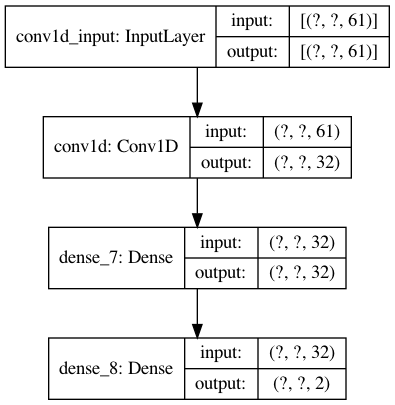

In [62]:
keras.utils.plot_model(conv_model, "images/dense_model.png", show_shapes=True)

In [63]:
conv_test[0][0,:,59:]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[7830., 3641.],
       [9469., 5643.],
       [5723., 6541.]], dtype=float32)>

In [64]:
conv_test[1][0]

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[8188., 5209.]], dtype=float32)>

In [65]:
conv_test[0][:,-1:,:]

<tf.Tensor: shape=(340, 1, 61), dtype=float32, numpy=
array([[[1.010e+03, 5.610e+03, 1.000e+01, ..., 8.000e+01, 5.723e+03,
         6.541e+03]],

       [[4.540e+02, 3.554e+03, 7.000e+00, ..., 5.200e+01, 3.614e+03,
         8.972e+03]],

       [[4.510e+02, 1.951e+03, 5.000e+00, ..., 3.600e+01, 5.742e+03,
         6.064e+03]],

       ...,

       [[5.580e+02, 3.233e+03, 5.000e+00, ..., 4.800e+01, 7.655e+03,
         9.678e+03]],

       [[8.540e+02, 4.729e+03, 8.000e+00, ..., 7.900e+01, 7.787e+03,
         9.820e+03]],

       [[6.470e+02, 4.522e+03, 7.000e+00, ..., 7.100e+01, 3.361e+03,
         7.851e+03]]], dtype=float32)>

In [66]:
test_hold[0]#[24]

<tf.Tensor: shape=(340, 1, 61), dtype=float32, numpy=
array([[[1.010e+03, 5.610e+03, 1.000e+01, ..., 8.000e+01, 5.723e+03,
         6.541e+03]],

       [[4.540e+02, 3.554e+03, 7.000e+00, ..., 5.200e+01, 3.614e+03,
         8.972e+03]],

       [[4.510e+02, 1.951e+03, 5.000e+00, ..., 3.600e+01, 5.742e+03,
         6.064e+03]],

       ...,

       [[5.580e+02, 3.233e+03, 5.000e+00, ..., 4.800e+01, 7.655e+03,
         9.678e+03]],

       [[8.540e+02, 4.729e+03, 8.000e+00, ..., 7.900e+01, 7.787e+03,
         9.820e+03]],

       [[6.470e+02, 4.522e+03, 7.000e+00, ..., 7.100e+01, 3.361e+03,
         7.851e+03]]], dtype=float32)>

In [67]:
tf.reduce_sum(tf.cast(test_hold[1]==conv_test[1],tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=680.0>

In [68]:
count=0
for i in test_hold[1]:
    if 0<tf.reduce_sum(tf.cast(i==conv_test[1],tf.float32)):
        count+=1
count

340

In [69]:
test_hold[1]

<tf.Tensor: shape=(340, 1, 2), dtype=float32, numpy=
array([[[ 8188.,  5209.]],

       [[ 4922., 10341.]],

       [[ 7893.,  3398.]],

       [[ 3365.,  8338.]],

       [[ 3614.,  8972.]],

       [[10532.,  4743.]],

       [[ 7339.,  7500.]],

       [[ 9469.,  5643.]],

       [[ 4853., 13759.]],

       [[ 7747.,  3841.]],

       [[ 4253.,  1646.]],

       [[ 5742.,  6064.]],

       [[ 2240.,  3301.]],

       [[ 2471.,  8393.]],

       [[ 5049.,  5718.]],

       [[ 7830.,  3641.]],

       [[ 5723.,  6541.]],

       [[11205.,  5554.]],

       [[ 4546.,  9427.]],

       [[ 8614.,  1247.]],

       [[ 8121.,  2408.]],

       [[ 3130.,  9134.]],

       [[ 6520.,  4831.]],

       [[ 3335.,  6673.]],

       [[ 2607.,  8416.]],

       [[ 2655.,  8154.]],

       [[10981.,  4373.]],

       [[ 9649.,  3533.]],

       [[12661.,  5442.]],

       [[ 8639.,  2345.]],

       [[ 1191.,   873.]],

       [[ 6237., 10488.]],

       [[ 6729.,  6611.]],

       [[ 7824.,  5104.

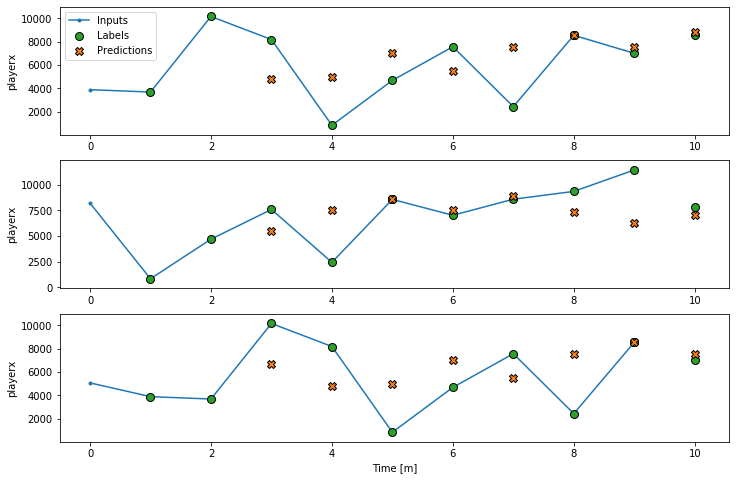

In [70]:
wide_window.plot(conv_model,input_width=3)

input (2380, 3, 61)
xy (2380, 3, 2)
label indices [3]
true 1
predi 1
true 1
predi 1
true 1
predi 1
prediction shape (2380, 1, 2)
(2380, 3, 2)
xy input tf.Tensor(
[[ 3422.  7856.]
 [ 2861. 10049.]
 [ 6575.  9344.]], shape=(3, 2), dtype=float32)
predictions tf.Tensor([[8433.866  7734.6626]], shape=(1, 2), dtype=float32)


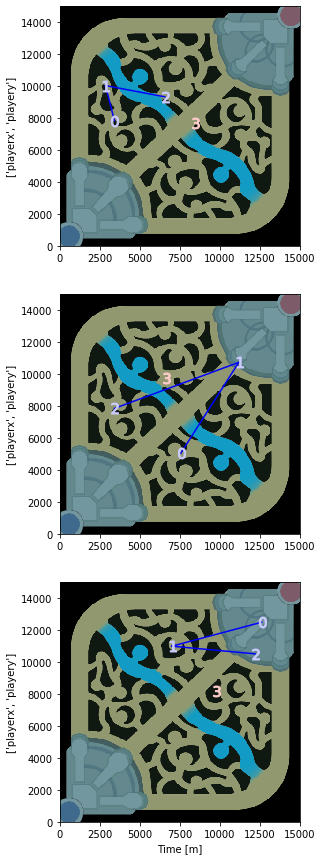

In [90]:
conv_window.plot_map(conv_model,input_width=1)

In [71]:
a = [1,2,3]
np.random.shuffle(a)

In [72]:
len(a)

3

In [73]:
a = list( range(3))

In [74]:
conv_test[0].shape

TensorShape([340, 3, 61])

In [75]:
wide_window.train[0][:,:,-2:]

<tf.Tensor: shape=(1400, 10, 2), dtype=float32, numpy=
array([[[ 3896.,  9855.],
        [ 3691.,  1074.],
        [10171.,  4860.],
        ...,
        [ 2440.,  4493.],
        [ 8557., 12704.],
        [ 7015.,  5371.]],

       [[ 8194.,  3431.],
        [  844.,  1472.],
        [ 4690., 10012.],
        ...,
        [ 8574.,  2510.],
        [ 9334.,  6373.],
        [11417.,  6275.]],

       [[ 5075.,  5721.],
        [ 3896.,  9855.],
        [ 3691.,  1074.],
        ...,
        [ 7577., 13242.],
        [ 2440.,  4493.],
        [ 8557., 12704.]],

       ...,

       [[13576.,  3107.],
        [ 2337.,  8393.],
        [ 7770., 10520.],
        ...,
        [ 3757.,  8160.],
        [ 6041.,  8703.],
        [ 7987.,  2346.]],

       [[10764.,  4472.],
        [ 5391.,  5497.],
        [ 4620.,  9789.],
        ...,
        [ 6717.,  7850.],
        [ 8335.,  5583.],
        [ 7924.,   851.]],

       [[ 7770., 10520.],
        [10764.,  4472.],
        [ 5391.,  5497.],

In [76]:
multi_step_dense.predict(conv_test[0][:2,:,:])

array([[[6020.606 , 6276.563 ]],

       [[5588.7144, 6482.5864]]], dtype=float32)

In [77]:
conv_test[0][0,:,:]

<tf.Tensor: shape=(3, 61), dtype=float32, numpy=
array([[2.0500e+02, 4.8050e+03, 9.0000e+00, 8.2000e+01, 1.1216e+04,
        6.8820e+03, 1.0100e+02, 3.7760e+03, 9.0000e+00, 0.0000e+00,
        7.5240e+03, 7.6680e+03, 3.2400e+02, 3.5240e+03, 9.0000e+00,
        4.0000e+00, 1.1012e+04, 1.0498e+04, 1.0800e+02, 3.1330e+03,
        7.0000e+00, 0.0000e+00, 1.3266e+04, 5.9650e+03, 2.9600e+02,
        5.3460e+03, 8.0000e+00, 0.0000e+00, 1.3569e+04, 8.1150e+03,
        8.1000e+01, 4.2310e+03, 8.0000e+00, 2.0000e+00, 3.1060e+03,
        5.4000e+02, 3.9900e+02, 5.6740e+03, 1.0000e+01, 0.0000e+00,
        7.9000e+02, 1.5220e+03, 2.9000e+02, 3.6650e+03, 7.0000e+00,
        0.0000e+00, 5.9660e+03, 1.7540e+03, 1.4220e+03, 5.4720e+03,
        1.0000e+01, 4.0000e+00, 6.6640e+03, 7.2630e+03, 0.0000e+00,
        2.0500e+02, 5.0950e+03, 8.0000e+00, 6.8000e+01, 7.8300e+03,
        3.6410e+03],
       [8.3700e+02, 5.4370e+03, 1.0000e+01, 1.0200e+02, 8.2560e+03,
        1.0287e+04, 6.8000e+01, 4.1780e+03, 9.

In [78]:
dense_test_pred.shape

(340, 1, 2)

<tf.Tensor: shape=(), dtype=float32, numpy=4404.0913>

In [81]:
type(test_hold[1])

tensorflow.python.framework.ops.EagerTensor